In [2]:
import json
import matplotlib.pyplot as pyplot
import matplotlib.patches as patches
import numpy as np
from PIL import Image
import os

In [89]:
entries = os.listdir('./imgs')

In [93]:
anno_path = "./instances_train2017.json"

In [6]:
with open(anno_path) as json_file:
    data = json.load(json_file)

In [77]:
VOC_CLASSES = ('aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor')

In [85]:
def rect_fn(xy1, xy2, color):
    x1 = xy1[0] 
    w = xy2[0] 
    y1 = xy1[1] 
    h = xy2[1] 
    rect = patches.Rectangle((x1,y1),w,h,linewidth=1,edgecolor=color,facecolor='none')
    return rect

In [ ]:
VOC_CLASSES = (    # always index 0
    'aeroplane', 'bicycle', 'bird', 'boat',
    'bottle', 'bus', 'car', 'cat', 'chair',
    'cow', 'diningtable', 'dog', 'horse',
    'motorbike', 'person', 'pottedplant',
'sheep', 'sofa', 'train', 'tvmonitor')

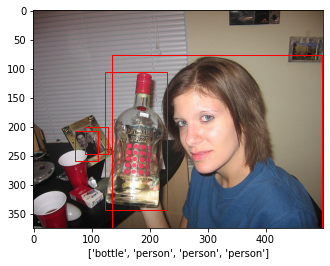

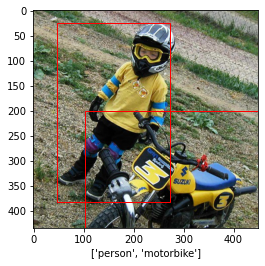

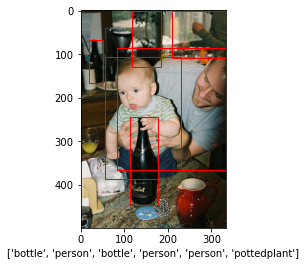

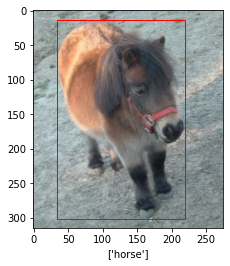

In [94]:
for i in range(len(entries) - 1):
    img_path = "./imgs/" + entries[i + 1]
    im = np.array(Image.open(img_path), dtype=np.uint8)
    
    ig,ax = pyplot.subplots(1)
    ax.imshow(im)

    
    ind = []
    im_id = entries[i + 1][:-4]
    im_id = im_id[:4] + im_id[5:]
    im_id = int(im_id)
    for j in range(len(data["annotations"])):
        if(data["annotations"][j]["image_id"] == im_id):
            ind.append(j)
        else:
            continue
    boxes = []
    clss_s = []
    for k in ind:
        boxes.append(data["annotations"][k]["bbox"])
        clss = VOC_CLASSES[data["annotations"][k]["category_id"]]
        clss_s.append(clss)
    for l in range(len(boxes)):
        xy1 = [boxes[l][0], boxes[l][1]]
        xy2 = [boxes[l][2], boxes[l][3]]
        rect = rect_fn(xy1, xy2, "red")
        ax.add_patch(rect)
    ax.set_xlabel(clss_s)
    pyplot.show()